In [2]:
import pandas as pd
import os
import seaborn as sns

In [3]:
INPUT_DIR = '../Data/raw/'

In [4]:
# append to train/test.csv
def get_essay(essay_id, is_train=True):
    parent_path = INPUT_DIR + 'train' if is_train else INPUT_DIR + 'test' 
    essay_path = os.path.join(parent_path, f"{essay_id}.txt")
    essay_text = open(essay_path, 'r').read()
    return essay_text

In [5]:
def discourse_size(discourse_text):
    return len(discourse_text)

In [49]:
duplicates = train[train.discourse_text.duplicated(keep=False)].sort_values(by="discourse_text")
duplicates.head(10)

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,essay_text,discourse_size
26691,7f9c3500259d,A602D45D22B2,"""That's a lava dome that takes the form of an ...",Evidence,Adequate,"Scientist Rafael, There's no way it was create...",104
27350,d628a6adda3a,ADB68BCD2874,"""That's a lava dome that takes the form of an ...",Evidence,Adequate,This face is not because of aliens it was just...,104
25391,781452d9404c,942ECB176B3A,"At the most basic level, the electoral college...",Position,Adequate,"At the most basic level, the electoral college...",68
28835,6fa171a95540,C2BAF4ADA2CA,"At the most basic level, the electoral college...",Claim,Adequate,I am in favor of changing to election by popul...,68
28436,9e12ec699196,BB3A6C2D0B65,Big States,Claim,Adequate,"Dear, State Senator\n\nI think we should keep ...",11
20121,35bf70c4a673,4CA37D113612,Big States,Claim,Ineffective,Have you ever wondered what the electoral coll...,11
3933,c5b2ecb3888e,44E2726DA1B3,I agree,Position,Adequate,Your principal has decided all students must p...,8
11285,5e4022e93247,CB66B685DAF6,I agree,Position,Adequate,Your principal has decided that all students m...,8
17087,99782ca26927,2714214F7D9E,I think students should be required to perform...,Position,Adequate,"Dear Principal,\n\nI think students should be ...",66
29590,33d6bbba823c,CE64FA08E4CF,I think students should be required to perform...,Position,Adequate,"Dear, Principal\n\nI think students should be ...",66


In [12]:
train = pd.read_csv(INPUT_DIR + 'train.csv')
train['essay_text'] = train['essay_id'].apply(lambda x: get_essay(x, is_train=True))
train.head(12)

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,essay_text
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate,"Hi, i'm Isaac, i'm going to be writing about h..."
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate,"Hi, i'm Isaac, i'm going to be writing about h..."
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate,"Hi, i'm Isaac, i'm going to be writing about h..."
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate,"Hi, i'm Isaac, i'm going to be writing about h..."
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate,"Hi, i'm Isaac, i'm going to be writing about h..."
5,36a565e45db7,007ACE74B050,"though some say that life on Mars does exist, ...",Rebuttal,Ineffective,"Hi, i'm Isaac, i'm going to be writing about h..."
6,fb65fe816ba3,007ACE74B050,"It says in paragraph 7, on April 5, 1998, Mars...",Evidence,Adequate,"Hi, i'm Isaac, i'm going to be writing about h..."
7,4e472e2584fa,007ACE74B050,Everyone who thought it was made by alieans ev...,Counterclaim,Adequate,"Hi, i'm Isaac, i'm going to be writing about h..."
8,28a94d3ee425,007ACE74B050,Though people were not satified about how the ...,Concluding Statement,Adequate,"Hi, i'm Isaac, i'm going to be writing about h..."
9,d226f06362f5,00944C693682,Limiting the usage of cars has personal and pr...,Lead,Effective,Limiting the usage of cars has personal and pr...


In [16]:
train['discourse_size'] = train['discourse_text'].apply(lambda x: discourse_size(x))

In [17]:
train.head(12)

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,essay_text,discourse_size
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate,"Hi, i'm Isaac, i'm going to be writing about h...",317
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate,"Hi, i'm Isaac, i'm going to be writing about h...",210
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate,"Hi, i'm Isaac, i'm going to be writing about h...",105
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate,"Hi, i'm Isaac, i'm going to be writing about h...",362
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate,"Hi, i'm Isaac, i'm going to be writing about h...",101
5,36a565e45db7,007ACE74B050,"though some say that life on Mars does exist, ...",Rebuttal,Ineffective,"Hi, i'm Isaac, i'm going to be writing about h...",85
6,fb65fe816ba3,007ACE74B050,"It says in paragraph 7, on April 5, 1998, Mars...",Evidence,Adequate,"Hi, i'm Isaac, i'm going to be writing about h...",201
7,4e472e2584fa,007ACE74B050,Everyone who thought it was made by alieans ev...,Counterclaim,Adequate,"Hi, i'm Isaac, i'm going to be writing about h...",193
8,28a94d3ee425,007ACE74B050,Though people were not satified about how the ...,Concluding Statement,Adequate,"Hi, i'm Isaac, i'm going to be writing about h...",225
9,d226f06362f5,00944C693682,Limiting the usage of cars has personal and pr...,Lead,Effective,Limiting the usage of cars has personal and pr...,668


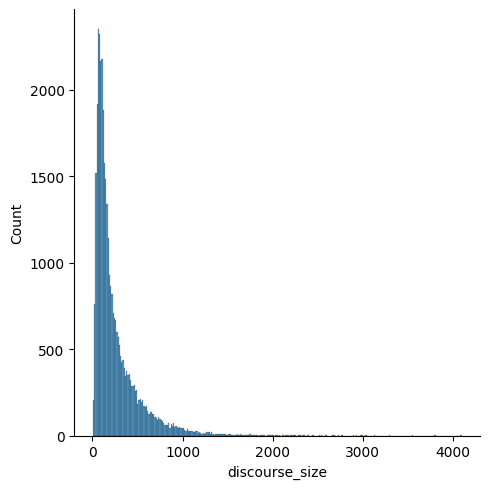

In [19]:
sns.displot(train['discourse_size'])

In [40]:
(train['discourse_size']>256).value_counts()

False    25173
True     11592
Name: discourse_size, dtype: int64

In [44]:
train[train['discourse_size']>256].discourse_effectiveness.value_counts()

Adequate       5202
Effective      4358
Ineffective    2032
Name: discourse_effectiveness, dtype: int64

In [45]:
train[train['discourse_size']<256].discourse_effectiveness.value_counts()

Adequate       15740
Effective       4954
Ineffective     4418
Name: discourse_effectiveness, dtype: int64

In [47]:
train['discourse_size'].describe()

count    36765.000000
mean       249.319652
std        262.652668
min          4.000000
25%         87.000000
50%        155.000000
75%        315.000000
max       4099.000000
Name: discourse_size, dtype: float64